In [2]:
import pandas as pd

# Path to the input CSV file (replace 'df.csv' with your actual file name)
input_csv_path = 'processed_with_clusters.csv'
# Path to the output CSV file
output_csv_path = 'clustered_averages.csv'

# Read the input CSV file into a dataframe
df = pd.read_csv(input_csv_path)

# Select only numeric columns for grouping and calculating mean
numeric_columns = df.select_dtypes(include=['number']).columns

# Group by 'cluster' and calculate the mean for each numeric column
clustered_df = df.head(10000).groupby('cluster')[numeric_columns].mean()

# Save the result to a CSV file
clustered_df.to_csv(output_csv_path)

print(f"Clustered averages saved to {output_csv_path}")

Clustered averages saved to clustered_averages.csv


In [7]:
from joblib import load
import pandas as pd

# Avoid using 'input' as a variable name
input_file = 'clustered_averages.csv'

# Load the scaler
scaler = load('scaler.joblib')

# Read the input CSV file
df = pd.read_csv(input_file)

# Apply inverse_transform only on numeric columns that were scaled
numeric_columns = ['mean_latency', 'total_bitrate', 'upload_bitrate_mbits/sec', 'download_bitrate_rx_mbits/sec']
df[numeric_columns] = scaler.inverse_transform(df[numeric_columns])

# Select the desired columns
selection = df[['cluster', 'mean_latency', 'total_bitrate', 'upload_bitrate_mbits/sec', 'download_bitrate_rx_mbits/sec']]

# If you want to print the DataFrame, use this instead
print(selection)

   cluster  mean_latency  total_bitrate  upload_bitrate_mbits/sec  \
0        0     60.082822      32.506556                 10.501643   
1        1     46.026534      53.903472                 22.050579   
2        2    896.654661      32.240254                 10.766525   
3        3     41.561163      32.655136                 21.513269   
4        4    104.813077      68.172308                 10.500000   
5        5     72.271736      47.088054                 10.487808   
6        6    406.716265      27.708177                 10.443946   
7        7     64.098333      78.553333                 22.400000   
8        8     48.321039      20.242157                 10.499330   

   download_bitrate_rx_mbits/sec  
0                      22.004913  
1                      31.852894  
2                      21.473729  
3                      11.141867  
4                      57.672308  
5                      36.600246  
6                      17.264231  
7                      56.153

In [ ]:
import pandas as pd

# Path to the input CSV file (replace 'df.csv' with your actual file name)
input_csv_path = 'processed_with_clusters.csv'
# Path to the output CSV file
output_csv_path = 'clustered_averages.csv'

# Read the input CSV file into a dataframe
df = pd.read_csv(input_csv_path)

# Select only numeric columns for grouping and calculating mean
numeric_columns = df.select_dtypes(include=['number']).columns

# Group by 'cluster' and calculate the mean for each numeric column
clustered_df = df.head(10000).groupby('cluster')[numeric_columns].mean()

# Save the result to a CSV file
clustered_df.to_csv(output_csv_path)

print(f"Clustered averages saved to {output_csv_path}")

Clustered averages saved to clustered_averages.csv


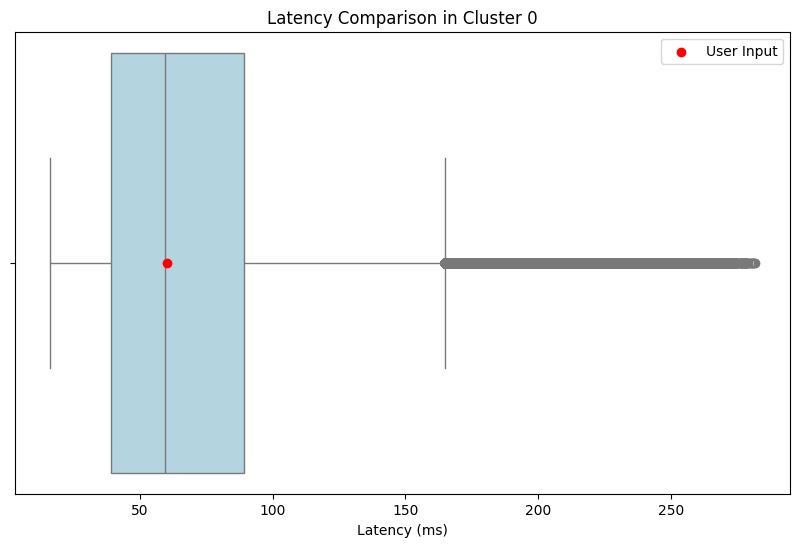

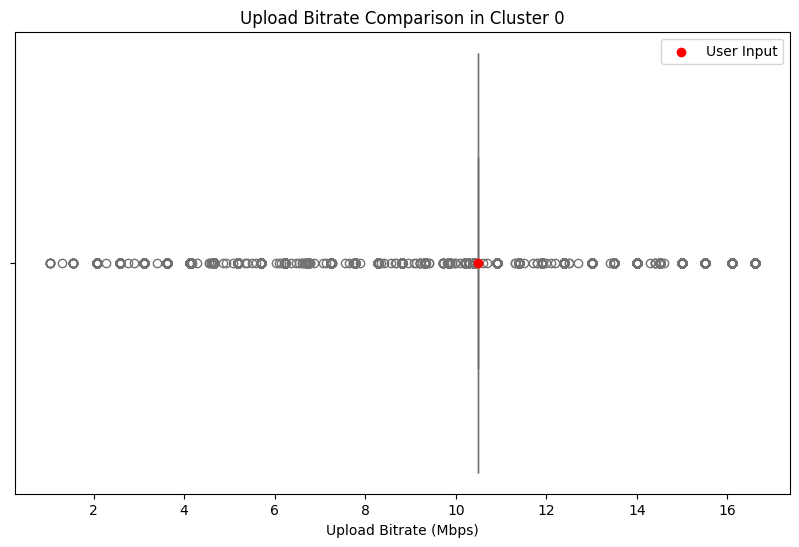

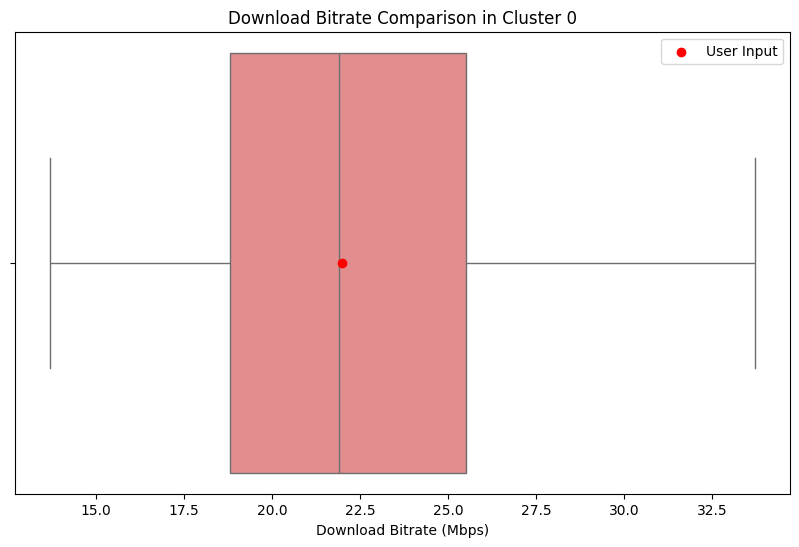

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a dataframe `df` with the data for your clusters
# and `predicted_cluster` is the cluster predicted for the user's input.
# Replace 'cluster_data.csv' with your actual dataset.
df = pd.read_csv('processed_with_clusters.csv')
scaler = load('scaler.joblib')

# Example user's input values
user_input_latency = 60.08 # User's input for latency
user_input_upload = 10.50  # User's input for upload bitrate
user_input_download = 22.00 # User's input for download bitrate
predicted_cluster = 0 # Cluster predicted for the user input

# Filter the dataframe for the predicted cluster
numeric_columns = ['mean_latency', 'total_bitrate', 'upload_bitrate_mbits/sec', 'download_bitrate_rx_mbits/sec']
df[numeric_columns] = scaler.inverse_transform(df[numeric_columns])
# Select the desired columns
df = df[['cluster', 'mean_latency', 'total_bitrate', 'upload_bitrate_mbits/sec', 'download_bitrate_rx_mbits/sec']]
cluster_df = df[df['cluster'] == predicted_cluster]
cluster_df.to_csv("filtered.csv",index=False)

# Plotting the Latency box plot with the user's input overlaid
plt.figure(figsize=(10, 6))
sns.boxplot(x=cluster_df['mean_latency'], color='lightblue')
plt.scatter(user_input_latency, 0, color='red', zorder=5, label='User Input')
plt.title(f'Latency Comparison in Cluster {predicted_cluster}')
plt.xlabel('Latency (ms)')
plt.legend()
plt.show()

# Similarly, you can do this for upload and download speeds

# Plotting Upload Bitrate box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=cluster_df['upload_bitrate_mbits/sec'], color='lightgreen')
plt.scatter(user_input_upload, 0, color='red', zorder=5, label='User Input')
plt.title(f'Upload Bitrate Comparison in Cluster {predicted_cluster}')
plt.xlabel('Upload Bitrate (Mbps)')
plt.legend()
plt.show()

# Plotting Download Bitrate box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=cluster_df['download_bitrate_rx_mbits/sec'], color='lightcoral')
plt.scatter(user_input_download, 0, color='red', zorder=5, label='User Input')
plt.title(f'Download Bitrate Comparison in Cluster {predicted_cluster}')
plt.xlabel('Download Bitrate (Mbps)')
plt.legend()
plt.show()

/var/folders/k8/x32sswqj4sl36h42w9j67pb80000gn/T/ipykernel_16662/559981825.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y='mean_latency', data=df, palette=cluster_colors)


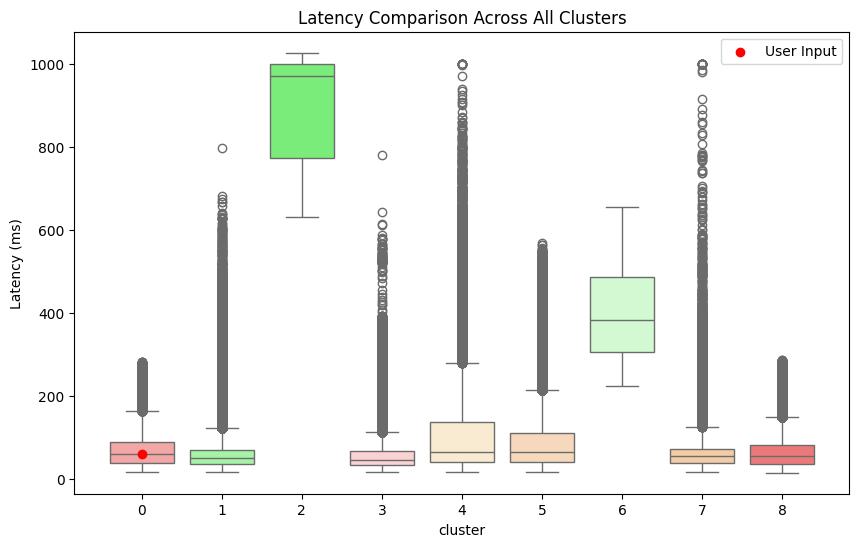

/var/folders/k8/x32sswqj4sl36h42w9j67pb80000gn/T/ipykernel_16662/559981825.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y='upload_bitrate_mbits/sec', data=df, palette=cluster_colors)


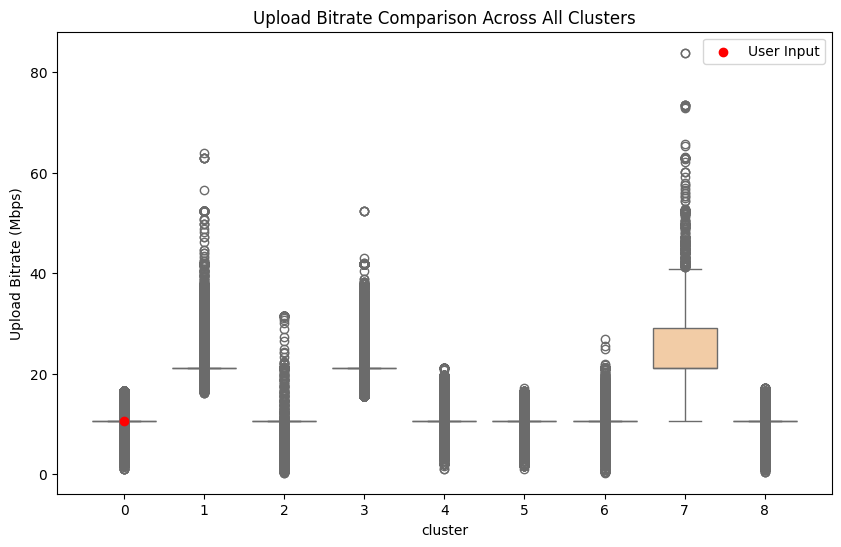

/var/folders/k8/x32sswqj4sl36h42w9j67pb80000gn/T/ipykernel_16662/559981825.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y='download_bitrate_rx_mbits/sec', data=df, palette=cluster_colors)


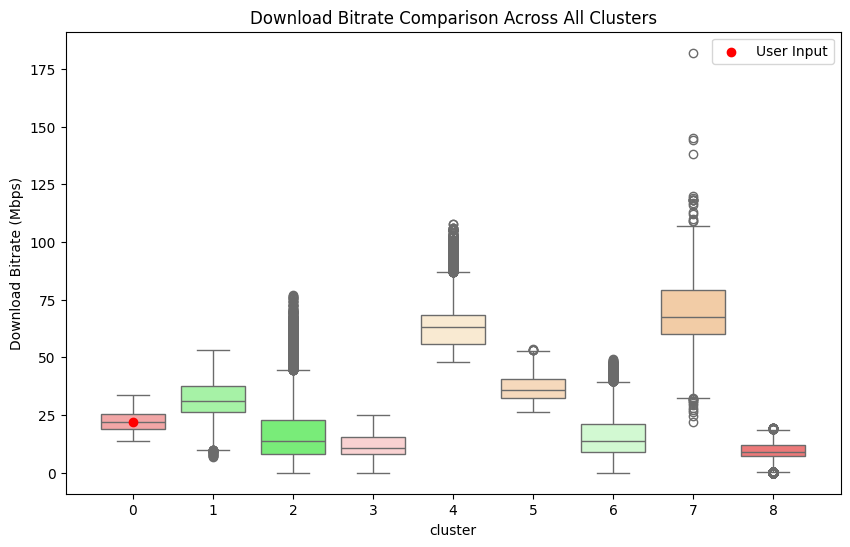

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from joblib import load

# Assuming you have a dataframe `df` with the data for your clusters
df = pd.read_csv('processed_with_clusters.csv')
scaler = load('scaler.joblib')

# Example user's input values
user_input_latency = 60.08  # User's input for latency
user_input_upload = 10.50   # User's input for upload bitrate
user_input_download = 22.00 # User's input for download bitrate
predicted_cluster = 0       # Cluster predicted for the user input

# Select the numeric columns for scaling
numeric_columns = ['mean_latency', 'total_bitrate', 'upload_bitrate_mbits/sec', 'download_bitrate_rx_mbits/sec']
df[numeric_columns] = scaler.inverse_transform(df[numeric_columns])

# Select the relevant columns for plotting
df = df[['cluster', 'mean_latency', 'total_bitrate', 'upload_bitrate_mbits/sec', 'download_bitrate_rx_mbits/sec']]

# Define a color palette for each cluster (assuming there are 9 clusters)
cluster_colors = ['#FF9999', '#99FF99', '#66FF66', '#FFCCCC', '#FFEBCC', '#FFD9B3', '#CCFFCC', '#FFCC99', '#FF6666']

# Plotting Latency box plot for all clusters with user's input overlaid
plt.figure(figsize=(10, 6))
sns.boxplot(x='cluster', y='mean_latency', data=df, palette=cluster_colors)
plt.scatter(predicted_cluster, user_input_latency, color='red', zorder=5, label='User Input')
plt.title('Latency Comparison Across All Clusters')
plt.ylabel('Latency (ms)')
plt.legend()
plt.show()

# Plotting Upload Bitrate box plot for all clusters with user's input overlaid
plt.figure(figsize=(10, 6))
sns.boxplot(x='cluster', y='upload_bitrate_mbits/sec', data=df, palette=cluster_colors)
plt.scatter(predicted_cluster, user_input_upload, color='red', zorder=5, label='User Input')
plt.title('Upload Bitrate Comparison Across All Clusters')
plt.ylabel('Upload Bitrate (Mbps)')
plt.legend()
plt.show()

# Plotting Download Bitrate box plot for all clusters with user's input overlaid
plt.figure(figsize=(10, 6))
sns.boxplot(x='cluster', y='download_bitrate_rx_mbits/sec', data=df, palette=cluster_colors)
plt.scatter(predicted_cluster, user_input_download, color='red', zorder=5, label='User Input')
plt.title('Download Bitrate Comparison Across All Clusters')
plt.ylabel('Download Bitrate (Mbps)')
plt.legend()
plt.show()

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from joblib import load

# Load your dataset and scaler
df = pd.read_csv('processed_with_clusters.csv')
scaler = load('scaler.joblib')

# Example user's input values
user_input_latency = 60.08 # User's input for latency
user_input_upload = 10.50  # User's input for upload bitrate
user_input_download = 22.00 # User's input for download bitrate
predicted_cluster = 0 # Cluster predicted for the user input

# Filter the dataframe for the predicted cluster
numeric_columns = ['mean_latency', 'total_bitrate', 'upload_bitrate_mbits/sec', 'download_bitrate_rx_mbits/sec']
df[numeric_columns] = scaler.inverse_transform(df[numeric_columns])

# Select the desired columns and group by cluster
df = df[['cluster', 'mean_latency', 'total_bitrate', 'upload_bitrate_mbits/sec', 'download_bitrate_rx_mbits/sec']]
clusters = df['cluster'].unique()

# Perform PCA to reduce dimensions
pca = PCA(n_components=2)
pca_features = pca.fit_transform(df[numeric_columns])

# Add the PCA features to the dataframe
df['PCA1'] = pca_features[:, 0]
df['PCA2'] = pca_features[:, 1]

# Create a 2x3 grid for the plots (including PCA scatter plot)
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Network Performance by Cluster with PCA', fontsize=16)

colors = sns.color_palette('Set1', len(clusters))
user_input_size = 200  # Larger size for better visibility
user_input_edge_color = 'black'  # Adding a black edge around the marker

# Plotting Latency for all clusters
sns.boxplot(data=df, x='cluster', y='mean_latency', ax=axes[0, 0], palette=colors)
axes[0, 0].scatter(predicted_cluster, user_input_latency, s=user_input_size, color='red', 
                   edgecolor=user_input_edge_color, zorder=5, label='User Input')
axes[0, 0].set_title('Latency Comparison (ms)')
axes[0, 0].legend()

# Plotting Upload Bitrate for all clusters
sns.boxplot(data=df, x='cluster', y='upload_bitrate_mbits/sec', ax=axes[0, 1], palette=colors)
axes[0, 1].scatter(predicted_cluster, user_input_upload, s=user_input_size, color='red', 
                   edgecolor=user_input_edge_color, zorder=5, label='User Input')
axes[0, 1].set_title('Upload Bitrate Comparison (Mbps)')
axes[0, 1].legend()

# Plotting Download Bitrate for all clusters
sns.boxplot(data=df, x='cluster', y='download_bitrate_rx_mbits/sec', ax=axes[0, 2], palette=colors)
axes[0, 2].scatter(predicted_cluster, user_input_download, s=user_input_size, color='red', 
                   edgecolor=user_input_edge_color, zorder=5, label='User Input')
axes[0, 2].set_title('Download Bitrate Comparison (Mbps)')
axes[0, 2].legend()

# Plotting Total Bitrate for all clusters
sns.boxplot(data=df, x='cluster', y='total_bitrate', ax=axes[1, 0], palette=colors)
axes[1, 0].scatter(predicted_cluster, (user_input_upload + user_input_download), s=user_input_size, 
                   color='red', edgecolor=user_input_edge_color, zorder=5, label='User Input')
axes[1, 0].set_title('Total Bitrate Comparison (Mbps)')
axes[1, 0].legend()

# Plotting PCA Scatter plot for clusters
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='cluster', palette=colors, ax=axes[1, 1])
axes[1, 1].scatter(pca.transform([[user_input_latency, user_input_upload + user_input_download, 
                                   user_input_upload, user_input_download]])[0, 0],
                   pca.transform([[user_input_latency, user_input_upload + user_input_download, 
                                   user_input_upload, user_input_download]])[0, 1],
                   s=user_input_size, color='red', edgecolor=user_input_edge_color, zorder=5, label='User Input')
axes[1, 1].set_title('PCA Scatter Plot (Clusters)')
axes[1, 1].legend()

# Remove empty subplot (axes[1, 2])
fig.delaxes(axes[1, 2])

# Adjust layout
# plt.tight_layout(rect=[0, 0, 1, 0.95])  # This leaves space for the title
# plt.show()

ValueError: operands could not be broadcast together with shapes (1145313,4) (7,) (1145313,4) 

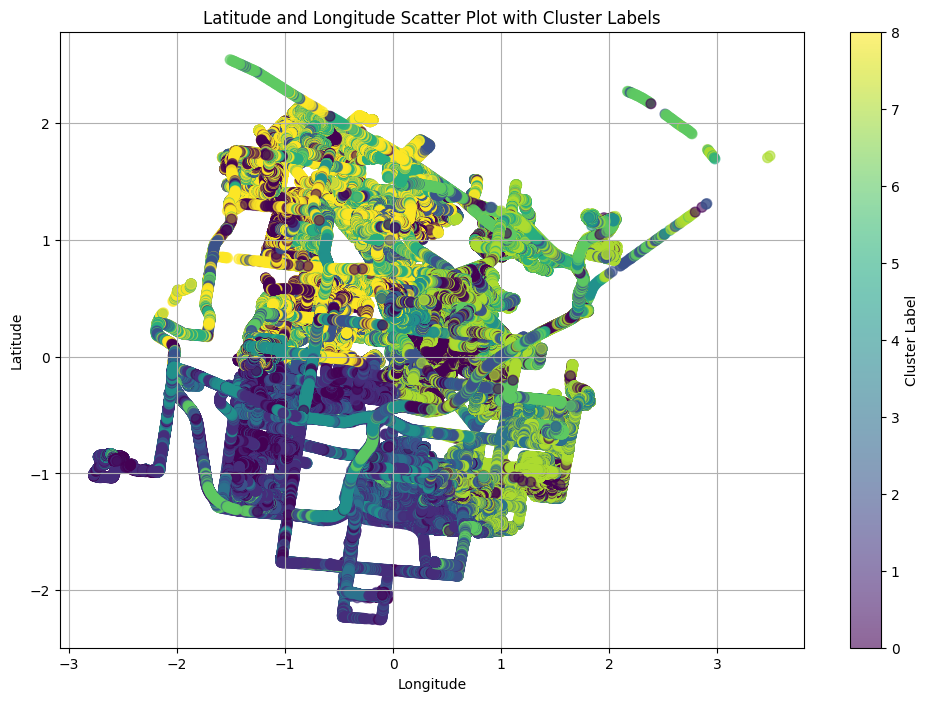

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the processed CSV file with cluster information
file_path = 'processed_with_clusters.csv'  # Update this path if necessary
df = pd.read_csv(file_path)

# Check for required columns
if 'longitude' in df.columns and 'latitude' in df.columns and 'cluster' in df.columns:
    # Plotting the latitude and longitude scatter plot with clusters
    plt.figure(figsize=(12, 8))
    scatter = plt.scatter(
        df['longitude'],
        df['latitude'],
        c=df['cluster'],
        cmap='viridis',
        alpha=0.6,
        s=50
    )
    plt.title('Latitude and Longitude Scatter Plot with Cluster Labels')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.colorbar(scatter, label='Cluster Label')
    plt.grid(True)
    plt.show()
else:
    print("The CSV file does not contain the required 'longitude', 'latitude', and 'cluster' columns.")
